# Tratando os Dados para responder a Questão 2 e a Questão 3 - Extra.

In [6]:
import pandas as pd
import os 

pasta = r'C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros'


dataframes = []

for arquivo in os.listdir(pasta):
    if arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(pasta, arquivo)
        print(f'Lendo arquivo: {caminho_arquivo}')

        df_temp = pd.read_csv(caminho_arquivo, delimiter='\t')

        df_temp['NumThreads'] = df_temp['NumThreads'].astype(int)
    
        df_ordenado = df_temp.sort_values(by='NumThreads', ascending = True)   

        dataframes.append(df_ordenado)


df_final_q2 = pd.concat(dataframes, ignore_index= True)
df_final_q2 = df_final_q2.sort_values(by='NumThreads', ascending=True).reset_index(drop=True)

print(df_final_q2.head())

df_final_q2.to_excel('dados_consolidados_q2.xlsx', index=False)

print("Todos os arquivos foram processados e salvos em 'dados_consolidados_q2.xlsx'.")

Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn100000-nt900-st1734563184880.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn150000-nt900-st1734563197951.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn200000-nt900-st1734563223100.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn250000-nt900-st1734563251605.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn300000-nt900-st1734563313917.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn350000-nt900-st1734563383624.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando Numeros\measurements-mn400000-nt900-st1734563534473.txt
Lendo arquivo: C:\Users\clodo\OneDrive\Área de Trabalho\BenchMark Alterando 

# Apresentando o DataFrame da Questão 2 - Problema 1, Aumentando a Carga e Mantendo o Número de Threads.

In [7]:
df_final_q2.rename(columns= {'StartTime' : 'TempoInicial', 'ElapsedTime' : 'TempoDecorrido', 'MeanUtilization' : 'UtilizacaoMedia'}, inplace=True)
df_final_q2

,NumThreads,NumeroMaximo,TempoInicial,TempoDecorrido,UtilizacaoMedia
0,900,100000,1734563184880,4031,0.990896
1,900,150000,1734563197951,11620,0.992861
2,900,200000,1734563223100,21796,0.993196
3,900,250000,1734563251605,36494,0.993417
4,900,300000,1734563313917,53804,0.996966
5,900,350000,1734563383624,74117,0.994555
6,900,400000,1734563534473,105074,0.993831
7,900,500000,1734563744942,127471,0.994847
8,900,600000,1734563970760,226271,0.994030
9,900,700000,1734564334537,253348,0.997180


# Como o Aumento da Carga do Sistema afeta o tempo total de Execução.

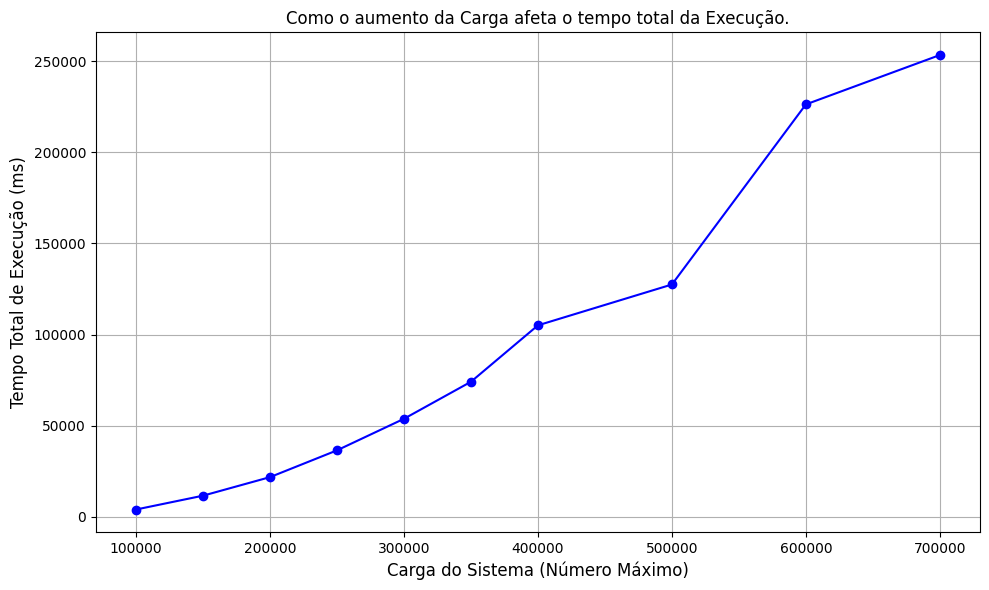

In [8]:

import matplotlib.pyplot as plt

carga_tempo = df_final_q2.groupby("NumeroMaximo")[("TempoDecorrido")].mean()

plt.figure(figsize=(10, 6))
plt.plot(carga_tempo.index, carga_tempo.values, marker = 'o', color = 'blue')
plt.title('Como o aumento da Carga afeta o tempo total da Execução.')
plt.xlabel('Carga do Sistema (Número Máximo)', fontsize = 12)
plt.ylabel('Tempo Total de Execução (ms)', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Relação entre Tempo de Execução e Utilização Média da CPU mantendo o Número de Threads

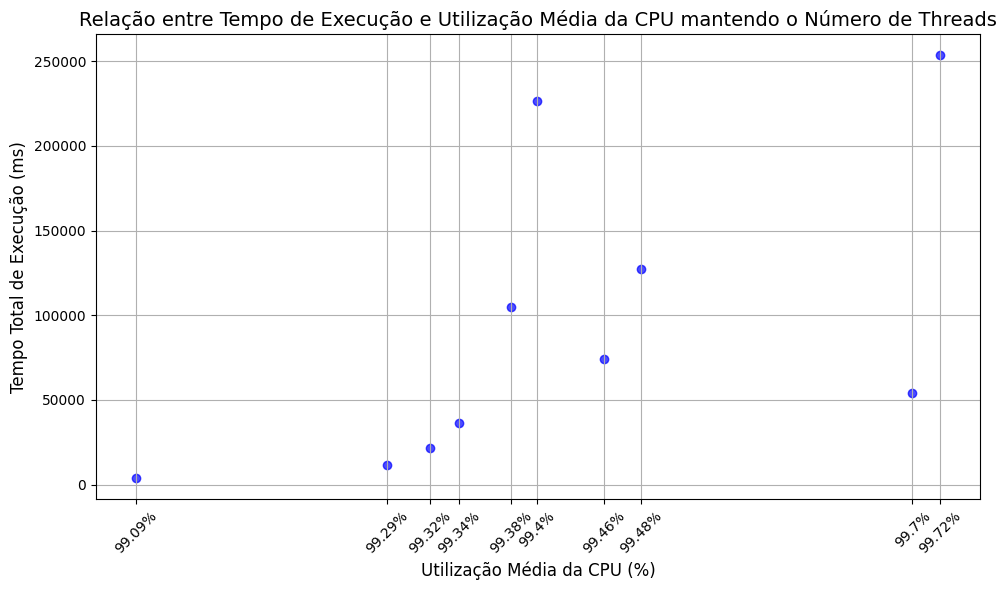

In [14]:


utilizacao_media = df_final_q2['UtilizacaoMedia']
tempo_decorrido = df_final_q2['TempoDecorrido']

plt.figure(figsize=(10, 6))
plt.scatter(utilizacao_media, tempo_decorrido, color='blue', alpha=0.7)
plt.title('Relação entre Tempo de Execução e Utilização Média da CPU mantendo o Número de Threads', fontsize=14)
plt.xlabel('Utilização Média da CPU (%)', fontsize=12)
plt.ylabel('Tempo Total de Execução (ms)', fontsize=12)
plt.grid(True)
x_ticks = utilizacao_media.unique() 
plt.xticks(x_ticks, [f"{round(x * 100, 2)}%" for x in x_ticks], rotation=45)
plt.tight_layout()
plt.show()
